# 1. 카메라 스티커앱 만들기

In [38]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib  # 얼굴의 랜드마크를 분리하기 위해서 사용

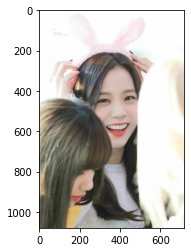

In [39]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/jisoo1.jpg'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()  # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

rectangles[[(260, 379) (527, 647)]]


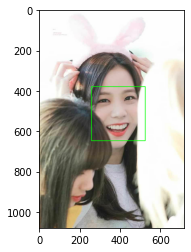

In [40]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()  #dlib을 이용해 얼굴영역 좌표출력, box처리
dlib_rects = detector_hog(img_rgb, 1)  # detector_hog를 통해 bounding box출력
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [41]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


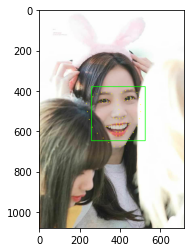

In [42]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [43]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])  # 코의 중심좌표(33) 사용
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print('(x, y): (%d, %d)'%(x, y))
    print('(w, h): (%d, %d)'%(w, h))

(400, 538)
(x, y): (400, 538)
(w, h): (268, 268)


(268, 268, 3)


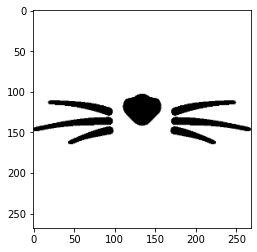

In [44]:
sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
print(img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [45]:
refined_x = x - w // 2
refined_y = y - w // 2
print('(x, y): (%d, %d)'%(refined_x, refined_y))

(x, y): (266, 404)


In [46]:
if refined_x < 0:  # 스티커 크기가 원본 이미지의 테두리를 벗어날 때 
    img_sticker = img_sticker[:, -refined_x:]  # 벗어난 부분만큼 crop
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (266,404)


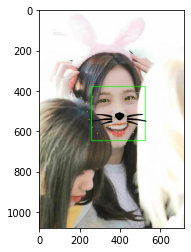

In [47]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]  # 원본이미지에 스티커 출력
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)  # 0을 넣었을 때 스티커의 흰배경이 나와서 255로 값 변경

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

np.where(조건, True, False) : 조건을 만족하는 pixel은 True값으로 치환, 조건을 만족하지 못하는 pixel은 False에 적힌 값으로 치환하는 함수
스티커 이미지가 하얀색인 부분은 sticker_area로 변경하고, 아니라면 스티커 이미지를 그대로 출력

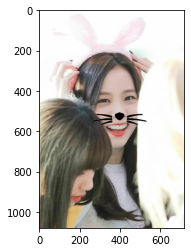

In [48]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]   # bounding box와 landmark제거하고 img_rgb사용하여 출력
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 1-2. 여러가지 이미지 테스트
1) 얼굴 각도가 틀어진 이미지

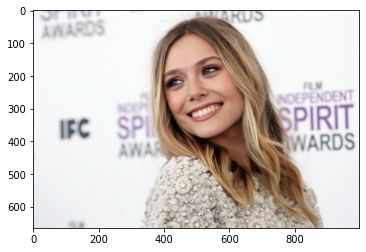

rectangles[[(379, 112) (646, 379)]]


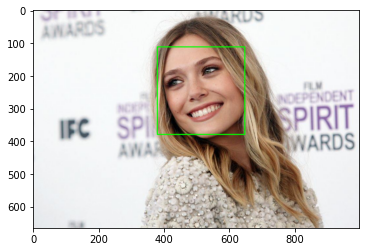

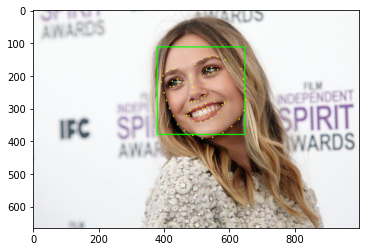

In [49]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/olsen.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector() 
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

# bounding box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

bounding box와 landmark를 잡아내지 못해서 이미지 피라미드를 2로 하고 실행했더니 팔의 옷주름을 얼굴로 인식. 

In [53]:
import math

myradians = math.atan2(landmark[39][0]-landmark[42][0], landmark[39][1]-landmark[42][1])
mydegrees = math.degrees(myradians)
mydegrees

def rotate_img(image, angle):
    
    tilt_sticker = cv2.rotate(img_sticker, mydegrees)


각도에 따른 스티커 적용은 어려워서 넘어갔습니다. cv2.rotate를 사용하여 적용하는 방법등 여러가지를 찾아보았지만 체득하는데 무리가 있어서 파이썬과 opencv 공부를 더 해보고 다시 도전하도록 하겠음.

2) 여러명이 나온 이미지

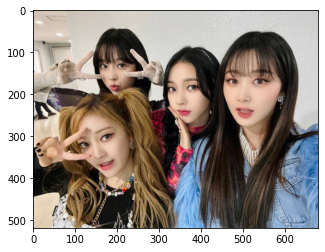

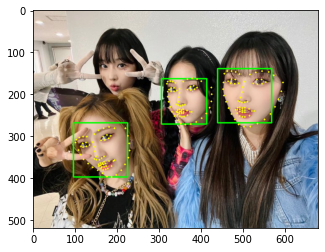

In [59]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/aespa.jpg'
img_bgr = cv2.imread(my_image_path) 
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# bounding box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(498, 220)
(158, 356)
(352, 228)


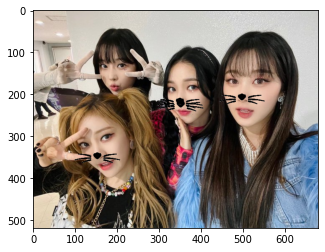

In [60]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]   # bounding box와 landmark제거하고 img_rgb사용하여 출력
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 얼굴마다 스티커 붙여주기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2.1)
    y = landmark[30][1]
    refined_y = int(y - w//2.1)

# bounding box와 landmark가 없는 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

얼굴 윤곽이 가려지거나 턱선이 뚜렸하게 나오지않으면 landark가 생성되지 않고 스티커 적용도 안되는 것을 확인했음.

3) 밝기가 밝은 이미지 

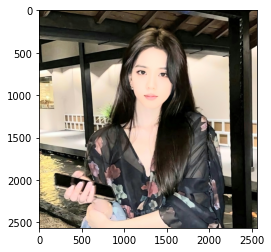

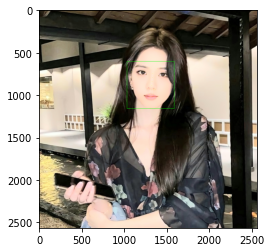

(1321, 939)


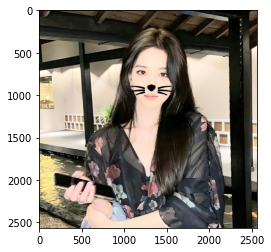

In [57]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/jisoo_brightness.jpg'
img_bgr = cv2.imread(my_image_path) 
img_show = img_bgr.copy() 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1) 

# bounding box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

밝기가 밝은 이미지는 bounding box는 생성되었지만 landmark는 생성되지 않았음. 하지만 스티커 이미지는 정상적으로 붙은걸 확인했다.

4) 거리가 먼 이미지

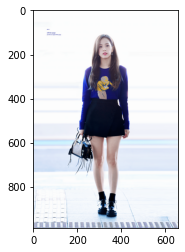

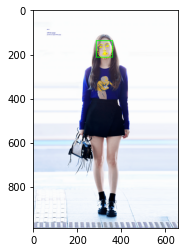

(325, 185)


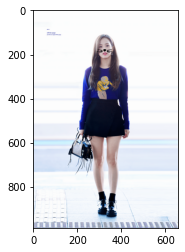

In [61]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/jisoo_distance.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# bounding box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

거리가 먼 이미지도 정상적으로 landmark가 생성되고 스티커도 적용된 것을 확인했음.

5) 마스크를 쓴 사람의 이미지

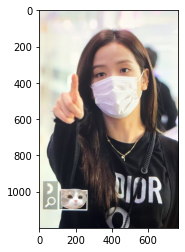

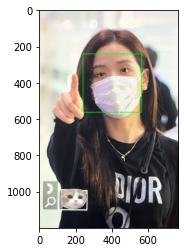

(416, 455)


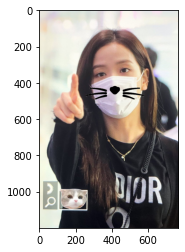

In [62]:
# 원본 이미지 불러오기
my_image_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/jisoo_mask.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

# bounding box
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# landmark
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) 
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()

sticker_path = os.getenv("HOME") + '/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

마스크를 써서 코와 입, 턱선이 가려졌지만 예상외로 bounding box와 landmark를 생성하고 스티커를 적용시킨 것을 확인했음. 

# 2. 돌아보며

얼굴 윤곽이 잘 드러나고 이목구비에 명암이 어느정도 있는 좋은 이미지가 좋은 결과를 만든다는 것을 확인했다. 각도를 계산하여 스티커를 회전시켜 적용하는 과정을 수행하지 못하여 아쉽지만 opencv에 대해 많은 것을 알게되서 보람찬 exploration이었다.